Проведем EDA

In [2]:
#Скачаем датасет
import pandas as pd

splits = {'train': 'data/train-00000-of-00001-b42a775f407cee45.parquet', 'validation': 'data/validation-00000-of-00001-134b8fd0c89408b6.parquet'}
df = pd.read_parquet("hf://datasets/OpenAssistant/oasst1/" + splits["train"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
df.head()

,message_id,parent_id,user_id,created_date,text,role,lang,review_count,review_result,deleted,rank,synthetic,model_name,detoxify,message_tree_id,tree_state,emojis,labels
0,6ab24d72-0181-4594-a9cd-deaf170242fb,None,c3fe8c76-fc30-4fa7-b7f8-c492f5967d18,2023-02-05T14:23:50.983374+00:00,Can you write a short introduction about the r...,prompter,en,3,True,False,NaN,False,None,"{'toxicity': 0.00044308538781479, 'severe_toxi...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,"{'name': ['+1', '_skip_reply', '_skip_ranking'...","{'name': ['spam', 'lang_mismatch', 'pii', 'not..."
1,c8e83833-ecbc-44fe-b6db-735228c25a1c,6ab24d72-0181-4594-a9cd-deaf170242fb,2c96e467-66f0-4be7-9693-bda51356a424,2023-02-06T13:50:44.657083+00:00,"""Monopsony"" refers to a market structure where...",assistant,en,3,True,False,0.0,False,None,"{'toxicity': 0.00026396565954200923, 'severe_t...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,"{'name': ['+1', '_skip_labeling'], 'count': [3...","{'name': ['spam', 'fails_task', 'lang_mismatch..."
2,6708c47f-05c9-4346-b3d2-40b2bd24fde4,c8e83833-ecbc-44fe-b6db-735228c25a1c,2c96e467-66f0-4be7-9693-bda51356a424,2023-02-06T18:48:49.391686+00:00,Now explain it to a dog,prompter,en,3,True,False,NaN,False,None,"{'toxicity': 0.03648477792739868, 'severe_toxi...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,None,"{'name': ['spam', 'lang_mismatch', 'pii', 'not..."
3,343ee2d4-87ae-41fd-a768-bdd65959dc4a,6ab24d72-0181-4594-a9cd-deaf170242fb,49ddcb0d-6588-43bd-858d-19c577f12e7b,2023-02-06T13:37:56.044680+00:00,Monopsony is a market structure in which there...,assistant,en,3,True,False,1.0,False,None,"{'toxicity': 0.0008866374846547842, 'severe_to...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,"{'name': ['+1', '_skip_reply', '_skip_labeling...","{'name': ['spam', 'fails_task', 'lang_mismatch..."
4,18145bf4-37fd-4ac0-80f5-6108b5f2b365,343ee2d4-87ae-41fd-a768-bdd65959dc4a,e10e99a0-38ac-4b07-bf5d-4427696e4e0d,2023-02-06T18:52:51.428543+00:00,How can one fight back when a monospony had be...,prompter,en,3,True,False,NaN,False,None,"{'toxicity': 0.0009362137061543763, 'severe_to...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,"{'name': ['+1'], 'count': [1]}","{'name': ['spam', 'lang_mismatch', 'pii', 'not..."


In [4]:
#Выберем только русский язык
ru_df = df[df['lang'] == 'ru']

In [5]:
#Необходимое нам начало запроса
top_level = ru_df[ru_df['parent_id'].isna()]

In [6]:
#Добавим стоблец длина запроса
top_level['text_len'] = top_level['text'].str.len()

<ipython-input-6-7e458dc736d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_level['text_len'] = top_level['text'].str.len()


In [7]:
#Посмотрим на полученную таблицу
top_level.head()

,message_id,parent_id,user_id,created_date,text,role,lang,review_count,review_result,deleted,rank,synthetic,model_name,detoxify,message_tree_id,tree_state,emojis,labels,text_len
82,e480f611-0d31-433a-93d2-0e2bc675aa30,None,05a999f8-8219-4584-a3f2-d4b4aec30027,2023-02-06T23:09:05.356836+00:00,Напиши информацию о игре Hytale,prompter,ru,3,True,False,NaN,False,None,"{'toxicity': 0.0008757906034588814, 'severe_to...",e480f611-0d31-433a-93d2-0e2bc675aa30,ready_for_export,"{'name': ['+1', '_skip_ranking', '_skip_labeli...","{'name': ['spam', 'lang_mismatch', 'pii', 'not...",31
185,fa8c92d6-6daa-42a3-a2f5-e2e0eb610c41,None,19241e3c-8272-4c3f-afe8-527c005d042c,2023-02-07T14:36:48.863674+00:00,"Докончи поговорку, без труда не выловишь и",prompter,ru,3,True,False,NaN,False,None,"{'toxicity': 0.0432540699839592, 'severe_toxic...",fa8c92d6-6daa-42a3-a2f5-e2e0eb610c41,ready_for_export,"{'name': ['+1', '-1'], 'count': [3, 1]}","{'name': ['spam', 'lang_mismatch', 'pii', 'not...",42
315,ef69d986-aa2d-4c3e-a122-1910d9625c79,None,6b1efbfa-7c16-47bf-b90c-340ab2b1b7eb,2023-02-08T14:59:45.846381+00:00,"У меня угнали машину, что мне делать?",prompter,ru,3,True,False,NaN,False,None,"{'toxicity': 0.004925671499222517, 'severe_tox...",ef69d986-aa2d-4c3e-a122-1910d9625c79,ready_for_export,"{'name': ['+1', '_skip_reply'], 'count': [4, 1]}","{'name': ['spam', 'lang_mismatch', 'pii', 'not...",37
327,e321f8f6-01f8-4975-afe6-73db989f538e,None,3c8cde8c-9466-494f-9c36-cbf3c3ac7ecd,2023-02-08T14:19:18.286994+00:00,Какие произведения Булгакова связаны с Иерусал...,prompter,ru,3,True,False,NaN,False,None,"{'toxicity': 0.0015869040507823229, 'severe_to...",e321f8f6-01f8-4975-afe6-73db989f538e,ready_for_export,"{'name': ['+1', '_skip_reply', '_skip_ranking'...","{'name': ['spam', 'lang_mismatch', 'pii', 'not...",51
427,5083658c-e251-4259-b180-77afaf907d66,None,05a999f8-8219-4584-a3f2-d4b4aec30027,2023-02-07T15:32:50.130297+00:00,Плюсы и минусы языков программирования C++ и R...,prompter,ru,3,True,False,NaN,False,None,"{'toxicity': 0.0003262242244090885, 'severe_to...",5083658c-e251-4259-b180-77afaf907d66,ready_for_export,"{'name': ['+1', '_skip_reply'], 'count': [6, 3]}","{'name': ['spam', 'lang_mismatch', 'pii', 'not...",61


In [8]:
#Проверим есть ли пустые инструкции
top_level.text.isna().sum()

0

In [9]:
#Посмотрим информацию о длине запроса
top_level.text_len.describe()

,text_len
count,721.000000
mean,112.907074
std,257.021267
min,3.000000
25%,33.000000
50%,55.000000
75%,101.000000
max,3714.000000


In [10]:
#Посмотрим информацию о количестве рецензентов
top_level.review_count.value_counts()

,count
review_count,
3,709
4,11
5,1


In [11]:
threshold = 0.5
def extract_above_threshold_labels(label):
    # Извлекаем названия и значения
    if label:
      names = label['name']
      values = label['value']
      # Получаем лейблы, которые превышают порог
      return [name for name, value in zip(names, values) if value > threshold]
def extract_above_threshold_detoxify(label):
    return [label for label, value in label.items() if value > threshold]

# Применение функции и создание новой колонки
top_level['above_threshold_labels'] = top_level['labels'].apply(extract_above_threshold_labels)
top_level['above_threshold_detoxify'] = top_level['detoxify'].apply(extract_above_threshold_detoxify)

<ipython-input-11-09ab907cd50d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_level['above_threshold_labels'] = top_level['labels'].apply(extract_above_threshold_labels)
<ipython-input-11-09ab907cd50d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_level['above_threshold_detoxify'] = top_level['detoxify'].apply(extract_above_threshold_detoxify)


In [12]:
#Посмотрим на качество запросов
top_level['above_threshold_labels'].value_counts()

,count
above_threshold_labels,
[quality],254
[],252
"[quality, creativity]",133
[creativity],32
"[quality, humor, creativity]",17
"[quality, humor]",8
[humor],8
"[humor, creativity]",7
[violence],2


In [13]:
#Посмотрим на токсичность запросов
top_level['above_threshold_detoxify'].value_counts()

,count
above_threshold_detoxify,
[],709
[toxicity],7
"[toxicity, insult]",2
"[toxicity, identity_attack]",1
"[toxicity, sexual_explicit]",1
"[toxicity, threat]",1


In [22]:
import pandas as pd
import re
from collections import Counter
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

russian_text = " ".join(top_level['text'].dropna())

# Удаляем все символы, кроме букв и цифр, и приводим слова к нижнему регистру
tokens = re.findall(r'\b\w+\b', russian_text.lower())

stop_words = set(stopwords.words('russian'))

filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

word_freq = Counter(filtered_tokens)

print(word_freq.most_common(10))



[('the', 66), ('напиши', 61), ('какие', 52), ('почему', 52), ('это', 49), ('1', 43), ('такое', 41), ('привет', 39), ('of', 39), ('to', 38)]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<ipython-input-24-61690cf33813>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_level['created_date'] = pd.to_datetime(top_level['created_date'], utc=True, errors='coerce')
<ipython-input-24-61690cf33813>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_level.dropna(subset=['created_date'], inplace=True)
<ipython-input-24-61690cf33813>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

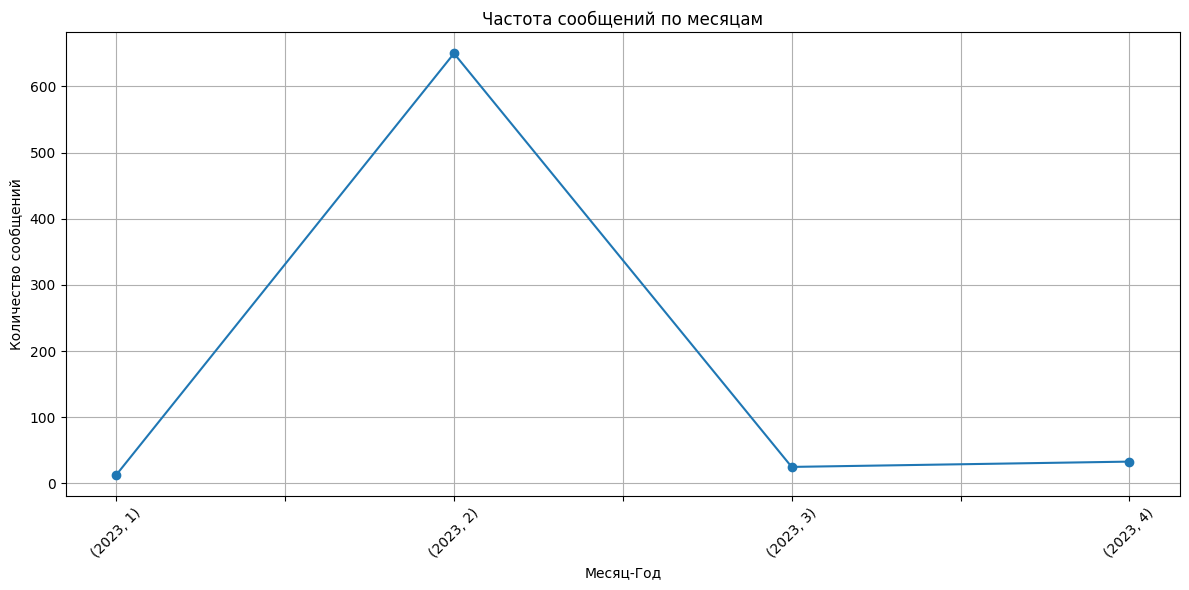

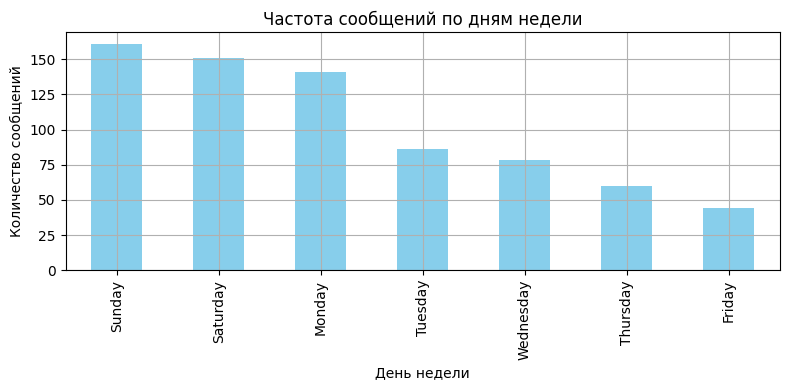

In [24]:
import matplotlib.pyplot as plt

top_level['created_date'] = pd.to_datetime(top_level['created_date'], utc=True, errors='coerce')

top_level.dropna(subset=['created_date'], inplace=True)

top_level['year'] = top_level['created_date'].dt.year
top_level['month'] = top_level['created_date'].dt.month
top_level['day'] = top_level['created_date'].dt.day
top_level['day_of_week'] = top_level['created_date'].dt.day_name()

monthly_counts = top_level.groupby(['year', 'month']).size()

# Визуализация частоты сообщений по месяцам
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o')
plt.title('Частота сообщений по месяцам')
plt.xlabel('Месяц-Год')
plt.ylabel('Количество сообщений')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

weekly_counts = top_level['day_of_week'].value_counts()

# Визуализация частоты сообщений по дням недели
plt.figure(figsize=(8, 4))
weekly_counts.plot(kind='bar', color='skyblue')
plt.title('Частота сообщений по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество сообщений')
plt.grid()
plt.tight_layout()
plt.show();


In [ ]:
df['created_date'] = pd.to_datetime(df['created_date'])
df.set_index('created_date', inplace=True)
df['message_count'] = 1
df.resample('D').sum()['message_count'].plot()

# Выводы

В данном датасете 721 top-level инструкций на русском языке. Средняя длина инструкции 112 слов, минимум 3 слова, максимум 3714 слов. Все инструкции отрецензированы больше чем 3 рецензентами. Более 50% инструкций отмечены качественными. Только около 1% инструкций отмечены токсичными. Самые часто встречающиеся слова: 'напиши', 'какие', 'почему'. Чаще всего инструкции создавались на выходных, а также в феврале 2023.